# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "HIV-Verlauf in Europa den letzten 35 Jahren"
### 1.2 Fragestellung:
1. Wo in Europa waren die meisten Menschen betroffen und warum? 
2. Ab wann konnten die Ansteckungen reduziert werden und wie?
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [8]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------------- -- 6.6/7.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 28.4 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --

In [8]:
import pandas as pd

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]

df = df[df["Entity"].isin(europe)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

df



,Entity,Code,Year,HIV prevalence - Sex: total - Age: 15-49 - Central estimate
34,Albania,ALB,1990,0.00064
35,Albania,ALB,1991,0.00070
36,Albania,ALB,1992,0.00090
37,Albania,ALB,1993,0.00123
38,Albania,ALB,1994,0.00175
...,...,...,...,...
5572,Ukraine,UKR,2017,0.96346
5573,Ukraine,UKR,2018,0.96401
5574,Ukraine,UKR,2019,0.96433
5575,Ukraine,UKR,2020,0.96143


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [20]:

import pandas as pd

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte europäische Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Filter auf ausgewählte Länder
df = df[df["Entity"].isin(selected_countries)]

# Filter auf letzte 35 Jahre
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

# Dynamisch die Spalte für die HIV-Werte finden
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]

# Pivot-Tabelle erstellen: Länder als Zeilen, Jahre als Spalten
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

# Pivot-Tabelle anzeigen
print("Pivot-Tabelle ausgewählter Länder:")
display(pivot_df)



Pivot-Tabelle ausgewählter Länder:


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Denmark,0.07244,0.08113,0.08874,0.09479,0.09922,0.10214,0.10378,0.10856,0.11429,0.11916,...,0.11194,0.10886,0.10562,0.10196,0.09781,0.09322,0.08826,0.08310,0.08235,0.08020
France,0.17639,0.17899,0.17892,0.17718,0.17447,0.17149,0.16923,0.17378,0.18451,0.19747,...,0.34583,0.34745,0.34873,0.34953,0.34975,0.34931,0.34827,0.34591,0.34392,0.34181
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.12344,0.12624,0.12861,0.13044,0.13183,0.13352,0.13440,0.13530,NaN,NaN
Greece,0.01588,0.02003,0.02438,0.02876,0.03302,0.03813,0.04332,0.04820,0.05262,0.05654,...,0.14103,0.14989,0.15837,0.16626,0.17340,0.17951,0.18435,0.18787,0.19012,0.19065
Italy,0.13751,0.15349,0.16685,0.17757,0.18587,0.19202,0.19763,0.20481,0.21322,0.22165,...,0.26809,0.26426,0.25986,0.25440,0.24786,0.23992,0.23116,0.22222,0.21279,0.20305
Netherlands,0.08215,0.08191,0.08149,0.08126,0.08137,0.08166,0.08533,0.09176,0.09899,0.10662,...,0.18700,0.18519,0.18256,0.17973,0.17602,0.17153,0.16618,0.16006,0.15837,NaN
Portugal,0.21919,0.27977,0.33801,0.38870,0.42977,0.46154,0.48504,0.50539,0.52522,0.54217,...,0.62632,0.61825,0.60906,0.59751,0.58397,0.56830,0.54999,0.52828,0.50637,0.48331
Spain,0.29223,0.33390,0.36678,0.38783,0.39783,0.39869,0.39795,0.39805,0.39697,0.39421,...,0.28971,0.28402,0.27865,0.27297,0.26567,0.25738,0.25095,0.24325,0.23719,0.23010
Switzerland,0.16040,0.17445,0.18550,0.19367,0.19845,0.19951,0.20264,0.20750,0.21180,0.21527,...,0.22879,0.22529,0.22115,0.21639,0.21096,0.20471,0.19765,0.19122,0.18326,0.17470


In [33]:
print("Länder im Filter:", selected_countries)
print("Länder mit Daten:", df["Entity"].unique())
print("Anzahl Länder mit Daten:", len(df["Entity"].unique()))

Länder im Filter: ['Switzerland', 'Germany', 'Spain', 'Portugal', 'France', 'Italy', 'United Kingdom', 'Netherlands', 'Belgium', 'Poland', 'Sweden', 'Finland', 'Norway', 'Denmark', 'Russia', 'Ukraine', 'Greece']
Länder mit Daten: ['Denmark' 'France' 'Germany' 'Greece' 'Italy' 'Netherlands' 'Portugal'
 'Spain' 'Switzerland' 'Ukraine']
Anzahl Länder mit Daten: 10


In [34]:
pivot_transposed = pivot_df.transpose()

print("Transponierte Pivot-Tabelle (Jahre als Zeilen, Länder als Spalten):")
display(pivot_transposed)

Transponierte Pivot-Tabelle (Jahre als Zeilen, Länder als Spalten):


Entity,Denmark,France,Germany,Greece,Italy,Netherlands,Portugal,Spain,Switzerland,Ukraine
Year,,,,,,,,,,
1990,0.07244,0.17639,NaN,0.01588,0.13751,0.08215,0.21919,0.29223,0.16040,0.02120
1991,0.08113,0.17899,NaN,0.02003,0.15349,0.08191,0.27977,0.33390,0.17445,0.03273
1992,0.08874,0.17892,NaN,0.02438,0.16685,0.08149,0.33801,0.36678,0.18550,0.05194
1993,0.09479,0.17718,NaN,0.02876,0.17757,0.08126,0.38870,0.38783,0.19367,0.08498
1994,0.09922,0.17447,NaN,0.03302,0.18587,0.08137,0.42977,0.39783,0.19845,0.14111
1995,0.10214,0.17149,NaN,0.03813,0.19202,0.08166,0.46154,0.39869,0.19951,0.22934
1996,0.10378,0.16923,NaN,0.04332,0.19763,0.08533,0.48504,0.39795,0.20264,0.34912
1997,0.10856,0.17378,NaN,0.04820,0.20481,0.09176,0.50539,0.39805,0.20750,0.47588
1998,0.11429,0.18451,NaN,0.05262,0.21322,0.09899,0.52522,0.39697,0.21180,0.59974


In [35]:
mean_per_country = pivot_df.mean(axis=1)


mean_table = mean_per_country.to_frame(name="Average HIV prevalence (%) across all years")

print("Durchschnittliche HIV-Prävalenz pro Land (über alle berücksichtigten Jahre):")
display(mean_table)

Durchschnittliche HIV-Prävalenz pro Land (über alle berücksichtigten Jahre):


,Average HIV prevalence (%) across all years
Entity,
Denmark,0.107914
France,0.273919
Germany,0.125876
Greece,0.097755
Italy,0.232526
Netherlands,0.141221
Portugal,0.541864
Spain,0.328404
Switzerland,0.211399


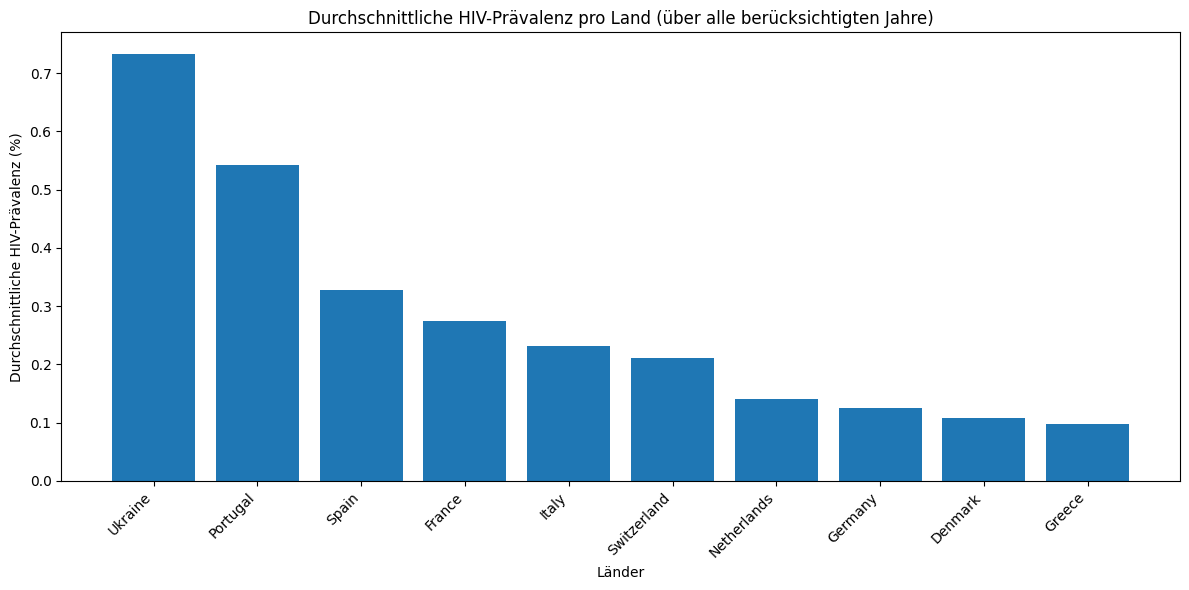

In [36]:
import matplotlib.pyplot as plt

mean_table_sorted = mean_table.sort_values(by="Average HIV prevalence (%) across all years", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(mean_table_sorted.index, mean_table_sorted["Average HIV prevalence (%) across all years"])

plt.xlabel("Länder")
plt.ylabel("Durchschnittliche HIV-Prävalenz (%)")
plt.title("Durchschnittliche HIV-Prävalenz pro Land (über alle berücksichtigten Jahre)")

# X-Achsen-Ticks lesbarer machen
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*


================ VARIABLE ANALYSE ================

1) Art der untersuchten Variable:
- Die HIV-Prävalenz ('HIV prevalence - Sex: total - Age: 15-49 - Central estimate') ist eine kontinuierliche numerische Variable.
- Die Länder (Entity) bilden diskrete Klassen (kategoriale Variable).

2) Diskrete Klassen (Länder):
- Anzahl untersuchter Länder mit vorhandenen Daten: 10
- Länder: ['Denmark', 'France', 'Germany', 'Greece', 'Italy', 'Netherlands', 'Portugal', 'Spain', 'Switzerland', 'Ukraine']

Datenpunkte pro Land:
Entity
Denmark        34
France         34
Greece         34
Italy          34
Spain          34
Portugal       34
Switzerland    34
Netherlands    33
Ukraine        32
Germany        12
Name: count, dtype: int64

================ FEHLENDE DATEN ANALYSE ================
Gesamtzahl fehlender HIV-Datenpunkte: 0

Fehlende Datenpunkte pro Land:
Entity
Denmark        0
France         0
Germany        0
Greece         0
Italy          0
Netherlands    0
Portugal       0
Spain      

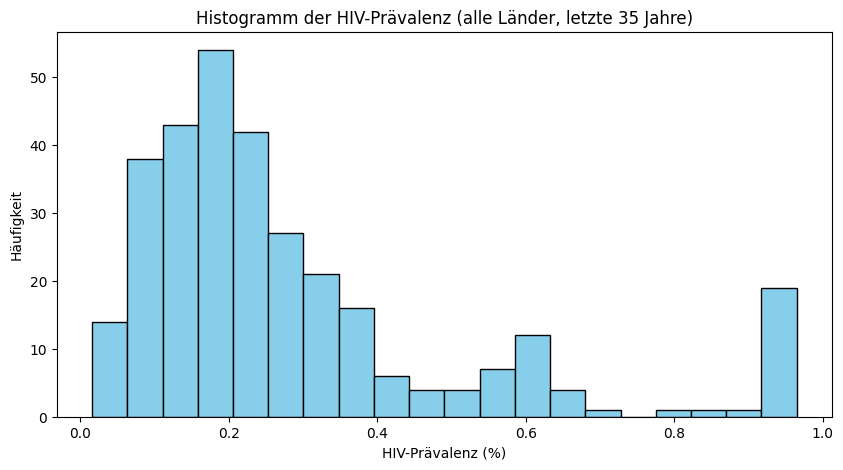

C:\Users\eliah\AppData\Local\Temp\ipykernel_22988\71600028.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Entity", y=hiv_col, palette="Pastel1")


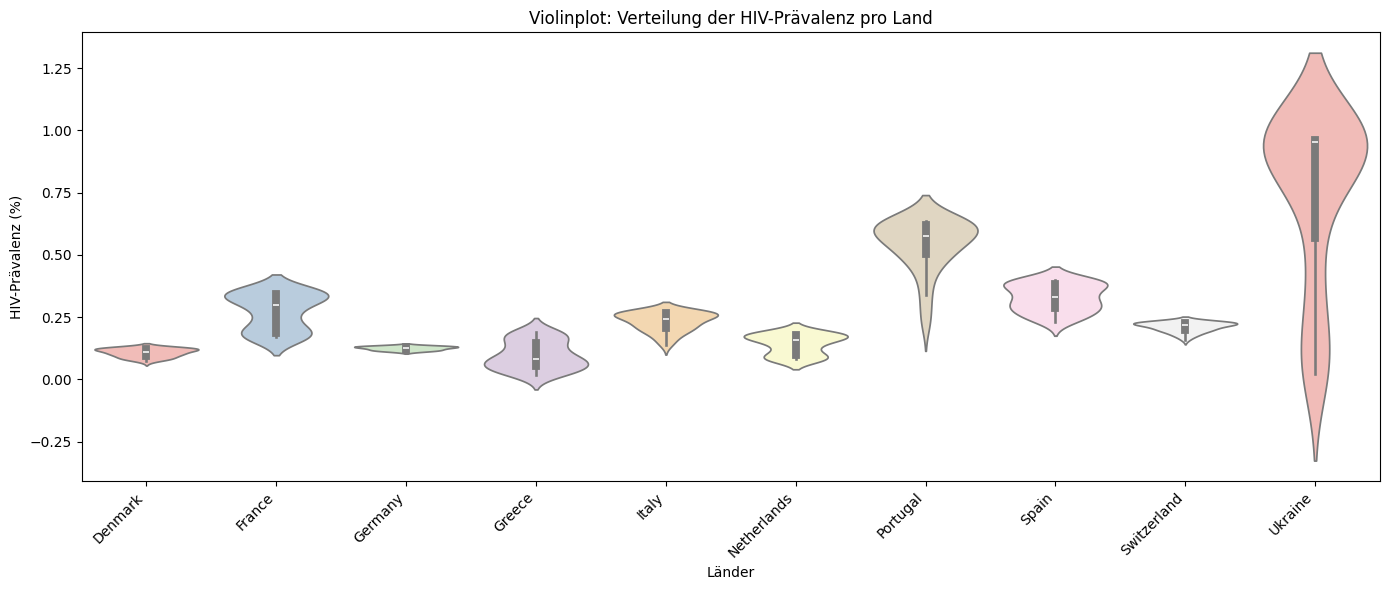

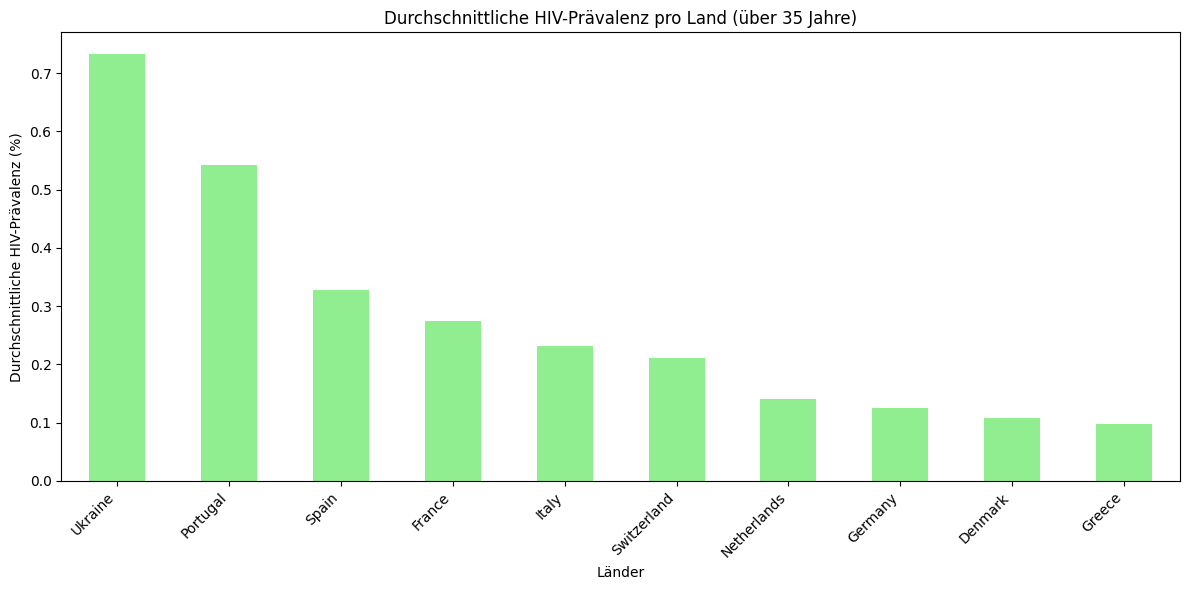


================ ZUSAMMENHANG: STREUDIAGRAMM ================


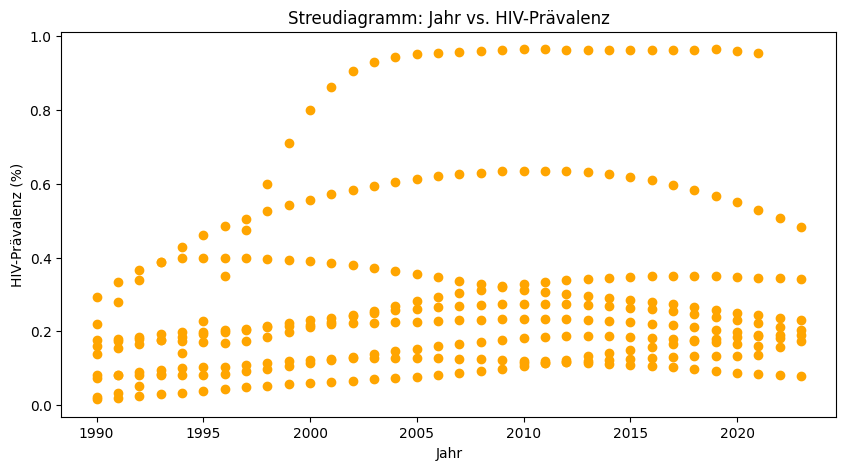


Interpretation:
- Das Streudiagramm zeigt mögliche Trends der HIV-Prävalenz über die Zeit.
- Je nach Land kann ein Rückgang, Anstieg oder Stabilisierung sichtbar sein.

================ PAIRPLOT (grafische Korrelation) ================


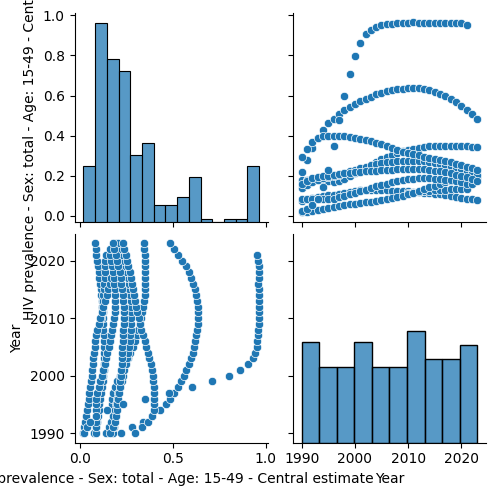


Interpretation Pairplot:
- Zeigt visuell die Beziehung zwischen Jahr und HIV-Prävalenz.
- Die Punkteverteilung gibt Hinweise auf steigende, sinkende oder stabile Trends.

================ ANALYSE FERTIG ================


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# 1. DATEN LADEN UND AUFBEREITEN
# ---------------------------------------------------------------
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Filter auf ausgewählte Länder
df = df[df["Entity"].isin(selected_countries)]

# Filter auf die letzten 35 Jahre
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

# HIV-Spalte dynamisch finden
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

# ---------------------------------------------------------------
# 2. BESCHREIBUNG DER VARIABLEN
# ---------------------------------------------------------------
print("\n================ VARIABLE ANALYSE ================")
print("\n1) Art der untersuchten Variable:")
print(f"- Die HIV-Prävalenz ('{hiv_col}') ist eine kontinuierliche numerische Variable.")
print("- Die Länder (Entity) bilden diskrete Klassen (kategoriale Variable).")

# ---------------------------------------------------------------
# 3. ANZAHL DISKRETER KLASSEN (LÄNDER)
# ---------------------------------------------------------------
countries = df["Entity"].unique()
print("\n2) Diskrete Klassen (Länder):")
print(f"- Anzahl untersuchter Länder mit vorhandenen Daten: {len(countries)}")
print("- Länder:", list(countries))
print("\nDatenpunkte pro Land:")
print(df["Entity"].value_counts())

# ---------------------------------------------------------------
# 4. FEHLENDE DATEN
# ---------------------------------------------------------------
print("\n================ FEHLENDE DATEN ANALYSE ================")
total_missing = df[hiv_col].isna().sum()
print(f"Gesamtzahl fehlender HIV-Datenpunkte: {total_missing}")

print("\nFehlende Datenpunkte pro Land:")
print(df.groupby("Entity")[hiv_col].apply(lambda x: x.isna().sum()))

# ---------------------------------------------------------------
# 5. VERTEILUNG DER VARIABLE
# ---------------------------------------------------------------
print("\n================ VERTEILUNG DER VARIABLE ================")
print("\nHistogramm, Violinplot und Mittelwert-Säulendiagramm werden dargestellt...")

# Histogramm
plt.figure(figsize=(10,5))
plt.hist(df[hiv_col].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramm der HIV-Prävalenz (alle Länder, letzte 35 Jahre)")
plt.xlabel("HIV-Prävalenz (%)")
plt.ylabel("Häufigkeit")
plt.show()

# Violinplot pro Land (ersetzt Boxplot)
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x="Entity", y=hiv_col, palette="Pastel1")
plt.title("Violinplot: Verteilung der HIV-Prävalenz pro Land")
plt.xlabel("Länder")
plt.ylabel("HIV-Prävalenz (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Säulendiagramm der Mittelwerte pro Land
mean_values = df.groupby("Entity")[hiv_col].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
mean_values.plot(kind="bar", color="lightgreen")
plt.title("Durchschnittliche HIV-Prävalenz pro Land (über 35 Jahre)")
plt.xlabel("Länder")
plt.ylabel("Durchschnittliche HIV-Prävalenz (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 6. ZUSAMMENHÄNGE ZWISCHEN VARIABLEN
# ---------------------------------------------------------------
print("\n================ ZUSAMMENHANG: STREUDIAGRAMM ================")
plt.figure(figsize=(10,5))
plt.scatter(df["Year"], df[hiv_col], color='orange')
plt.title("Streudiagramm: Jahr vs. HIV-Prävalenz")
plt.xlabel("Jahr")
plt.ylabel("HIV-Prävalenz (%)")
plt.show()
print("\nInterpretation:")
print("- Das Streudiagramm zeigt mögliche Trends der HIV-Prävalenz über die Zeit.")
print("- Je nach Land kann ein Rückgang, Anstieg oder Stabilisierung sichtbar sein.")

# Pairplot (ersetzt Korrelationsmatrix) – grafische Darstellung der Zusammenhänge
print("\n================ PAIRPLOT (grafische Korrelation) ================")
sns.pairplot(df[[hiv_col, "Year"]])
plt.show()

print("\nInterpretation Pairplot:")
print("- Zeigt visuell die Beziehung zwischen Jahr und HIV-Prävalenz.")
print("- Die Punkteverteilung gibt Hinweise auf steigende, sinkende oder stabile Trends.")

print("\n================ ANALYSE FERTIG ================")


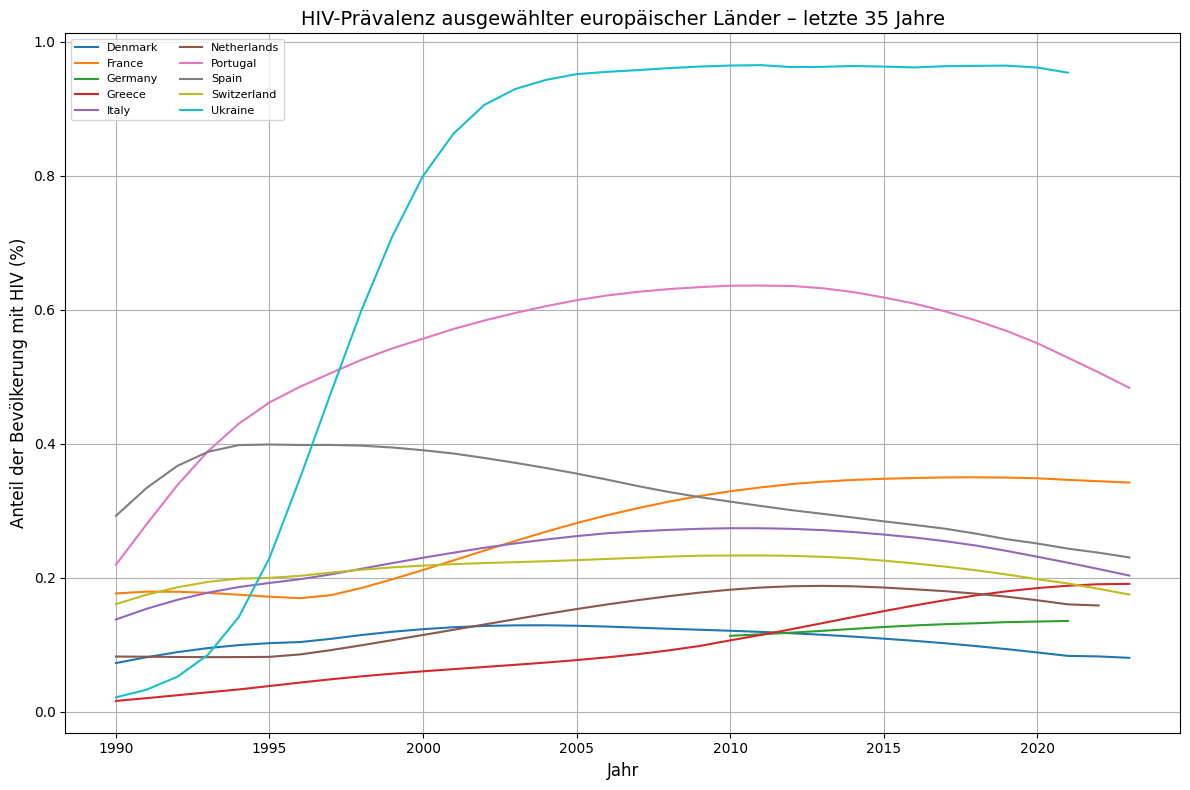

Anzahl Länder: 10
Anzahl Jahre: 34
Anzahl Datenpunkte (nicht-NaN): 315


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte europäische Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Filter auf ausgewählte Länder
df = df[df["Entity"].isin(selected_countries)]

# Filter auf letzte 35 Jahre
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

# Dynamisch die Spalte für die HIV-Werte finden
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]

# Pivot-Tabelle erstellen
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

# Diagramm erstellen
plt.figure(figsize=(12,8))
for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)

plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anteil der Bevölkerung mit HIV (%)", fontsize=12)
plt.title("HIV-Prävalenz ausgewählter europäischer Länder – letzte 35 Jahre", fontsize=14)
plt.legend(fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte europäische Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Filter auf ausgewählte Länder
df = df[df["Entity"].isin(selected_countries)]

# Filter auf letzte 35 Jahre
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

# Dynamisch die Spalte für die HIV-Werte finden
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
hiv_col = hiv_col[0]

# Pivot-Tabelle erstellen
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

# Anzahl Länder
num_countries = pivot_df.shape[0]

# Anzahl Jahre
num_years = pivot_df.shape[1]

# Anzahl Datenpunkte (Zellen mit Werten)
num_data_points = pivot_df.count().sum()  # zählt nur nicht-NaN-Werte

print(f"Anzahl Länder: {num_countries}")
print(f"Anzahl Jahre: {num_years}")
print(f"Anzahl Datenpunkte (nicht-NaN): {num_data_points}")


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

